# Project Overview

## Introduction

Credit card fraud remains a significant issue in today’s digital economy, posing substantial risks to both consumers and financial institutions. Having personally experienced multiple fraudulent transactions, I recognize the critical need for sophisticated detection systems to mitigate these threats. This project aims to deepen my understanding of fraud detection methodologies, focusing on identifying patterns and anomalies in transactional data. By developing and implementing a robust fraud detection system, I aim to contribute to more effective prevention strategies through data-driven insights.

## Dataset
The dataset used for this fraud detection project consists of several key attributes that provide a comprehensive view of individual credit card transactions. Each transaction is uniquely identified by an 'ID', ensuring precise tracking and record-keeping. The dataset includes 28 anonymized features labeled 'V1-V28', capturing critical transaction-related details such as time, location, and type, which are instrumental for analysis and fraud detection. The 'Amount' column denotes the monetary value of each transaction, reflecting the charge or credit processed. Additionally, the 'Class' attribute categorizes transactions as either 'legitimate' or 'fraudulent', serving as the foundation for identifying and analyzing potential fraud. This combination of features makes the dataset a valuable resource for developing and evaluating fraud detection systems.

In [225]:
#Importing necessary modules
import pandas as pd
import numpy as np

#Modules for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#Metric for model performace
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,\
f1_score, roc_auc_score, auc, precision_score, recall_score

## Data Loading and Exploration

In [4]:
data = pd.read_csv("creditcard_2023.csv", low_memory = False)

In [6]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [14]:
data.shape

(568630, 31)

In [16]:
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [28]:
data.duplicated().sum()

0

In [21]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Based on the initial exploratory data analysis (EDA), the dataset appears to be well-prepared for further modeling, with no missing or duplicated values detected. Additionally, the class distribution is balanced, with an even 50-50 split between the legitimate and fraudulent transactions, eliminating the need for immediate resampling or class-balancing techniques. This clean and balanced dataset provides an ideal foundation for developing an effective fraud detection model.

## Data Preprocessong

Although the dataset is clean, it is essential to standardize the 'Amount' column, as its varying scale may negatively impact the model's learning performance. Standardizing this feature will ensure that it is on a comparable scale with the other attributes, helping the model better interpret and learn from the data during training, ultimately leading to improved prediction accuracy.

In [36]:
scaler = StandardScaler()

data['scaled_amount'] = scaler.fit_transform(data[['Amount']])
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0,0.858447
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0,-0.796369
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0,-1.377011
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0,-0.962119
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0,0.323285


## Exploratory Data Analysis

Text(0.5, 1.0, 'Count plot of Fraudulant (1) VS Legitamate(0) transactions')

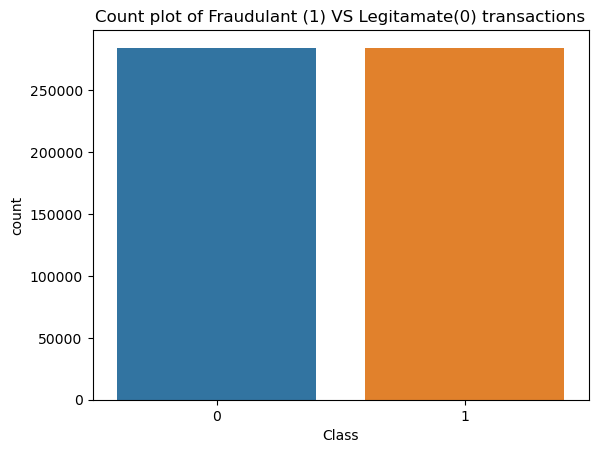

In [45]:
sns.countplot(x = 'Class', data = data)
plt.title('Count plot of Fraudulant (1) VS Legitamate(0) transactions')

Text(0.5, 1.0, 'Correlation Heatmap')

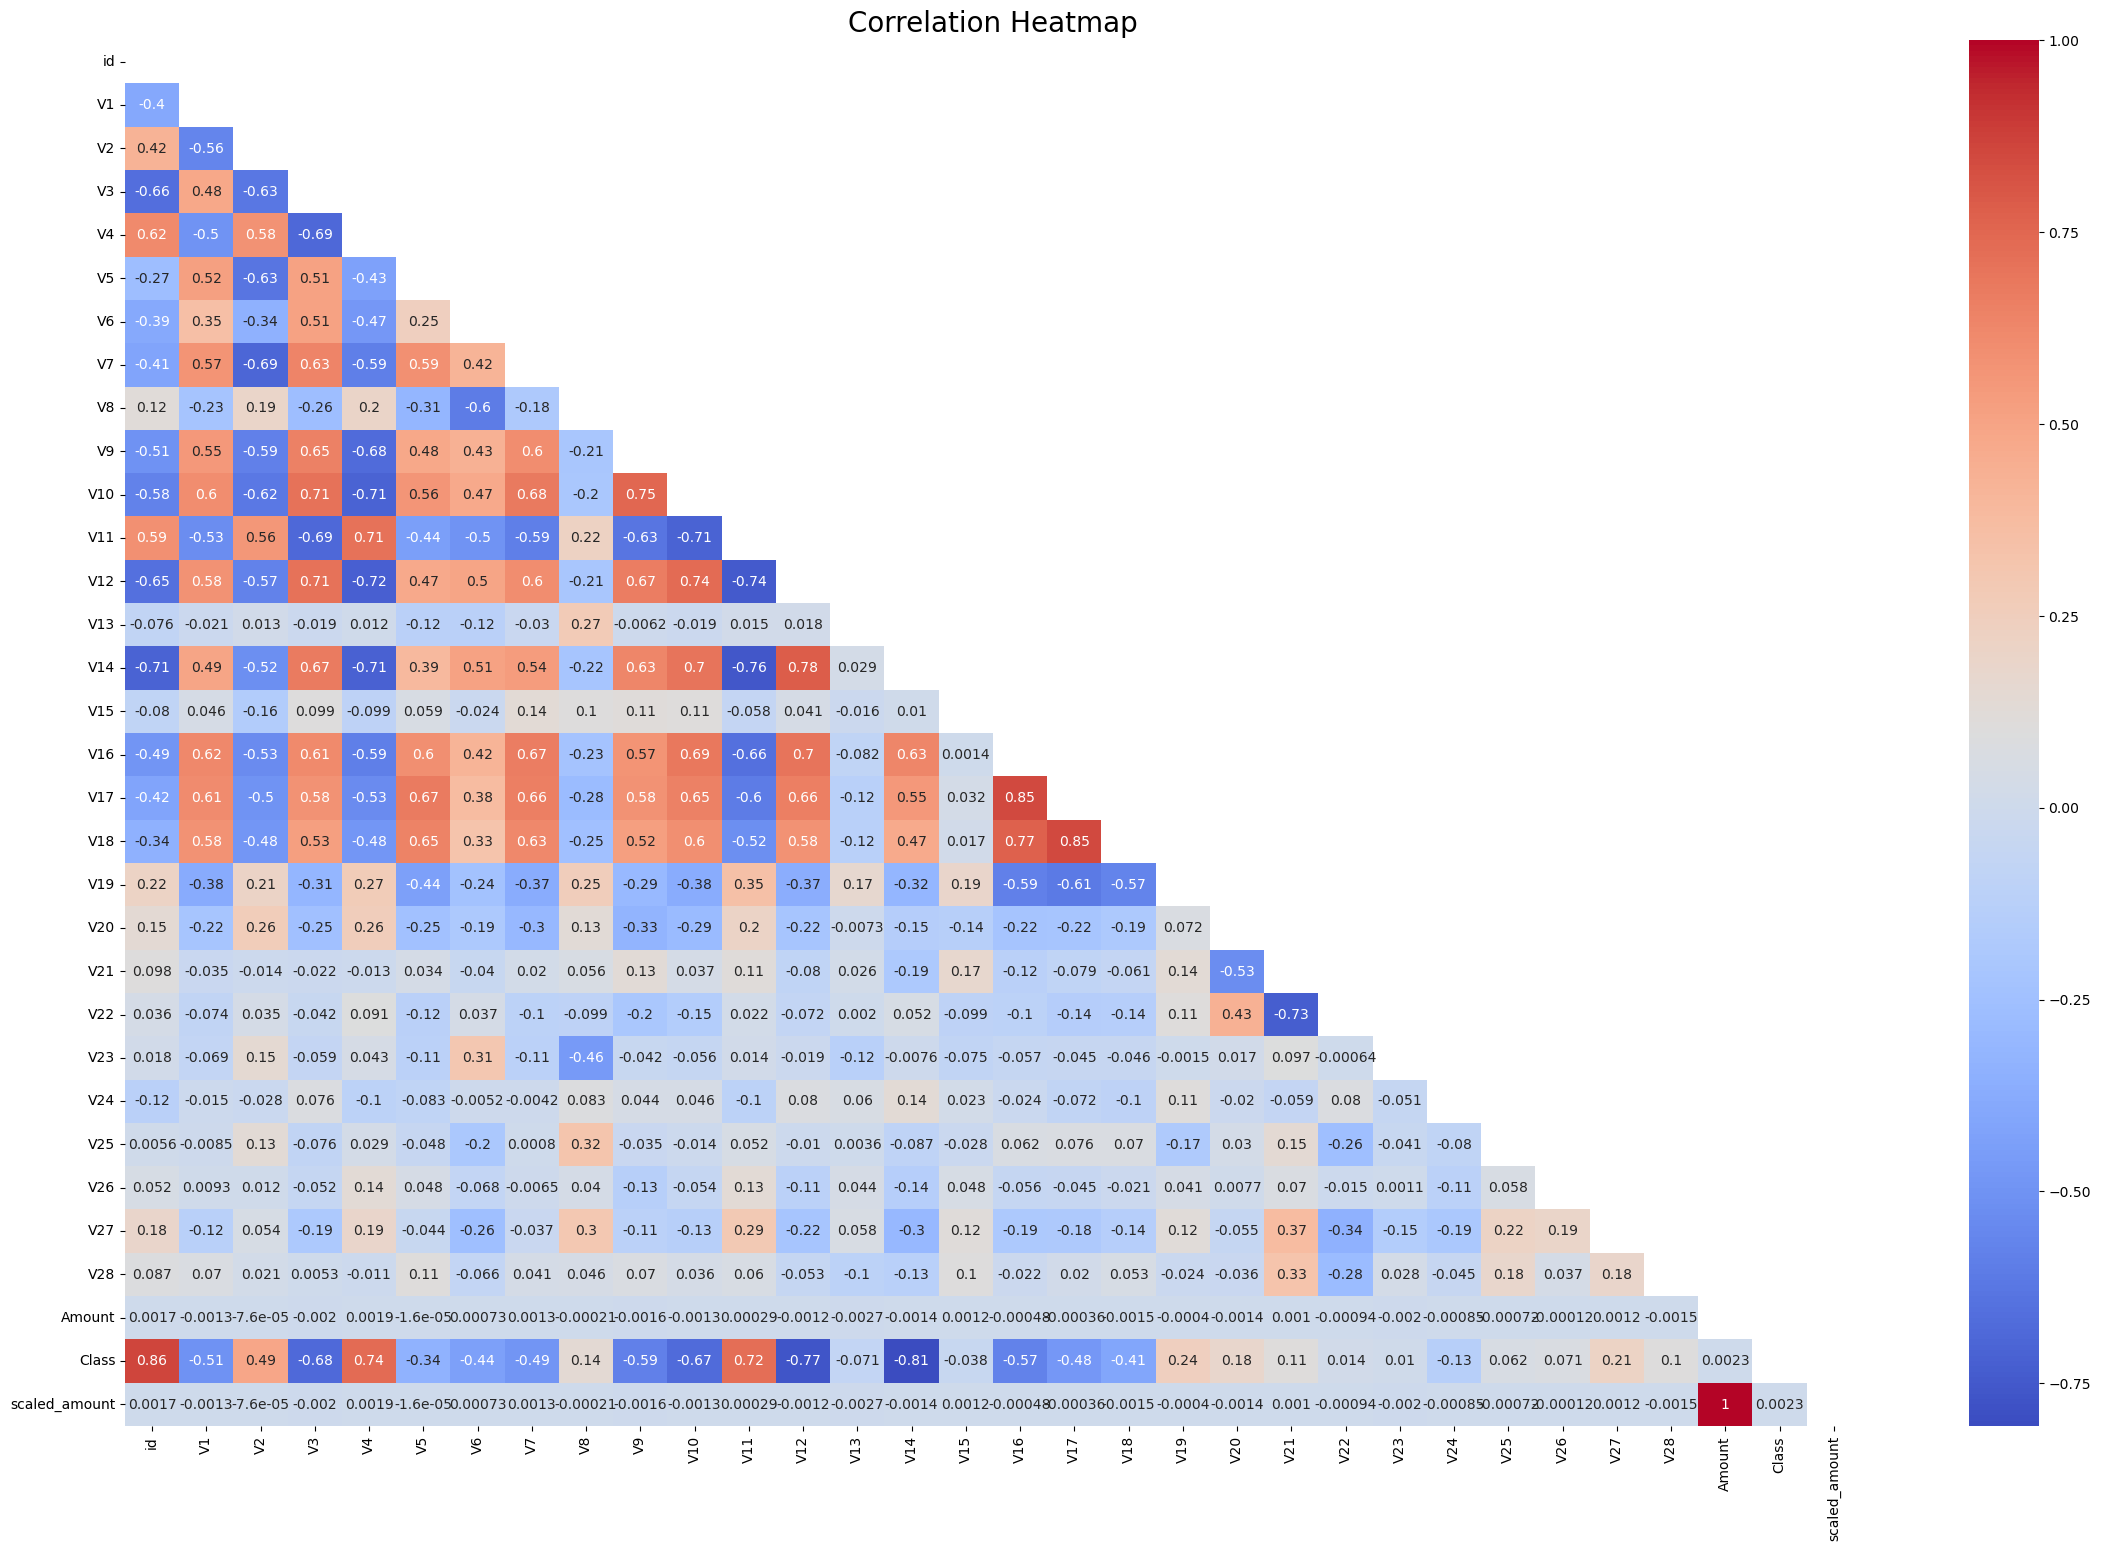

In [78]:
plt.figure(figsize = (28, 18))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', mask = mask)
plt.title('Correlation Heatmap', fontsize = 20)

## Modeling

In [136]:
#Splitting the data
X = data.drop(columns = ['id','Class', 'Amount'], axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [138]:
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(398041, 29) (170589, 29) (170589,) (398041,)


### Logistic Regression

In [141]:
model_lr = LogisticRegression() #Model initialization

#Model Optimization
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator = model_lr, param_grid = param_grid, cv = 5, scoring = 'f1')

grid_search.fit(X_train, y_train)

#Model Evaluation
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)



/Users/dinakarmurthy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dinakarmurthy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dinakarmurthy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dinakarmurthy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dinakarmurthy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dinakarmurthy/anac

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85386
           1       0.98      0.95      0.96     85203

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



Best parameters for logistic regression: 
- C: 100
- penalty: l2
- solver: liblinear

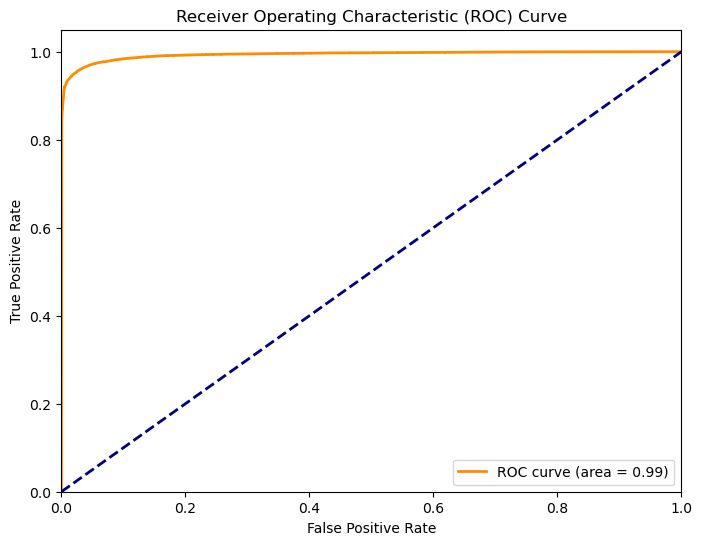

In [144]:
#Display ROC curve
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()

With an auc score of 0.99, the logistic regression model seems to have an almost perfect classification accuracy for fradulant and legitimate transaction.

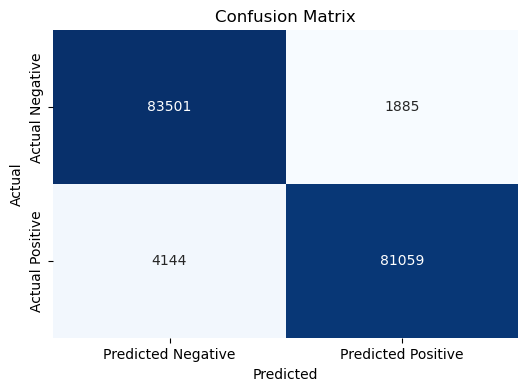

In [147]:
# Display Confusion Matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [168]:
param_grid = {
    'n_estimators': [10, 15, 30],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2, 4],
    'max_features': [0.5, 0.75, 1.0]
}

model_rf = RandomForestClassifier(random_state = 24, n_jobs = -1)

grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = param_grid, cv = 3, scoring = 'accuracy')

grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
y_pred = grid_search_rf.best_estimator_.predict(X_test)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Best Parameters: {'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85386
           1       1.00      1.00      1.00     85203

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Best parameters for the Random Forest Model:
- max_depth: 30,
- max_features: 0.5,
- min_samples_leaf: 2,
- min_sampels_split: 2
- n_estimators: 30

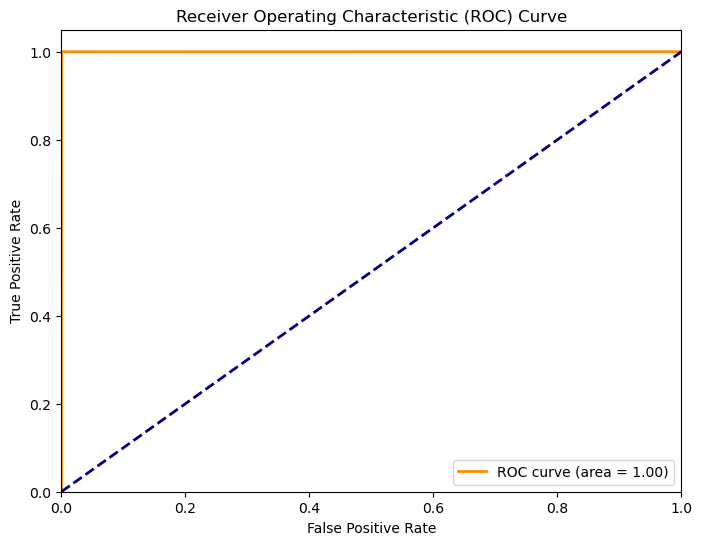

In [173]:
#Display ROC curve
y_prob = grid_search_rf.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()

With an AUC of 1, the random forest has perfect classification power for fraudulant and legitimate transactions

### XGBoost Classifier

In [183]:
model_xgb = XGBClassifier(random_state = 24)

param_grid = {
    'n_estimators': [15, 20, 30, 40], # Number of boosted trees
    'max_depth': [3, 5, 7, 10], #Max depth of each tree
    'learning_rate': [0.01, 0.1, 0.2], #Step size for shrinkage
    'subsample': [0.6, 0.8, 1.0], #Fraction of samples used for each tree
    'colsample_bytree': [0.5, 0.7, 1.0], #Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2], #Minimum loss reduction to make split
}

grid_search_xg = GridSearchCV(estimator = model_xgb, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs = -1)

grid_search_xg.fit(X_train, y_train)

print("Best Parameters:", grid_search_xg.best_params_)
y_pred = grid_search_xg.best_estimator_.predict(X_test)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

/Users/dinakarmurthy/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 40, 'subsample': 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85386
           1       1.00      1.00      1.00     85203

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



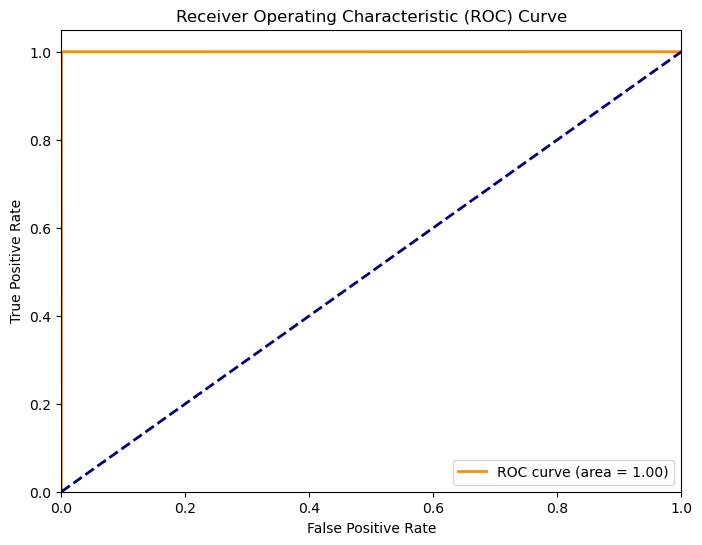

In [185]:
#Display ROC curve
y_prob = grid_search_xg.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()

With an AUC of 1, the XGBoost Classifier has perfect classification power for fraudulant and legitimate transactions

## Feature Importance

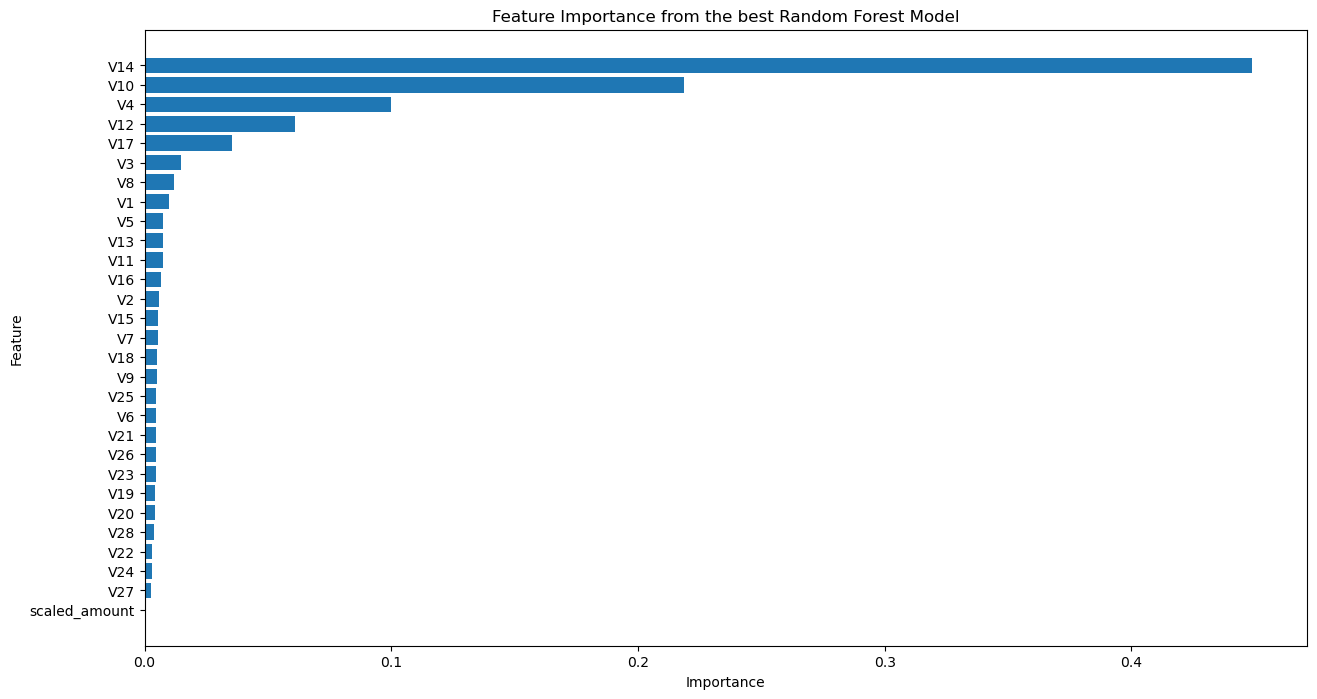

In [207]:
importances = grid_search_rf.best_estimator_.feature_importances_

feature_names = X_train.columns  # Make sure your features are in a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize = (15, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Feature Importance from the best Random Forest Model")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

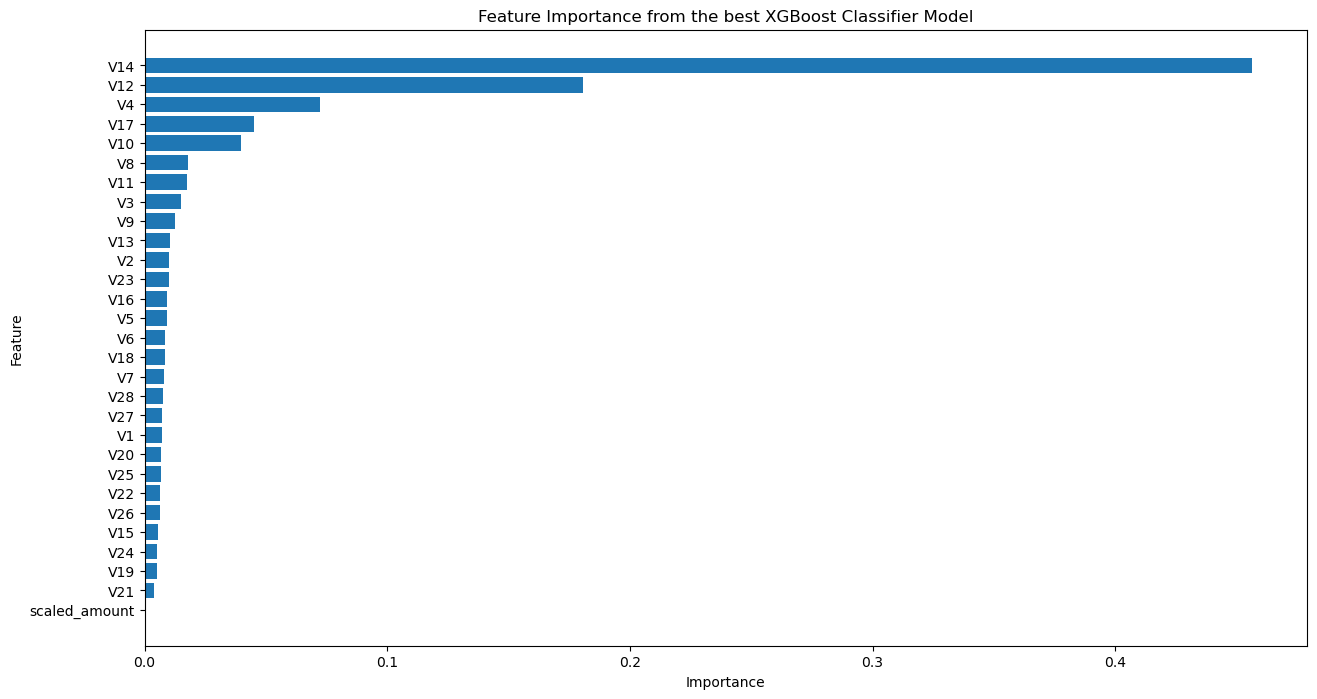

In [205]:
importances = grid_search_xg.best_estimator_.feature_importances_

feature_names = X_train.columns  # Make sure your features are in a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize = (15, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Feature Importance from the best XGBoost Classifier Model")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

Based on the feature importance generated by the random forest and XGBoost classifier, we can see the most important feature for identifing the legitimacy of a transaction is V14. The amount has the least importance for determining the legitimacy of a transaction.

## Results

In [231]:
#Compliling performance metrics from each model showing a comparitive plot

# Get best estimators
best_rf = grid_search_rf.best_estimator_
best_lr = grid_search.best_estimator_
best_xgb = grid_search_xg.best_estimator_

# Make predictions using cross_val_predict
y_pred_rf = cross_val_predict(best_rf, X_train, y_train, cv = 3)
y_pred_lr = cross_val_predict(best_lr, X_train, y_train, cv = 3)
y_pred_xgb = cross_val_predict(best_xgb, X_train, y_train, cv = 3)

# Calculate metrics for each model
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracy = [
    accuracy_score(y_train, y_pred_rf),
    accuracy_score(y_train, y_pred_lr),
    accuracy_score(y_train, y_pred_xgb)
]
precision = [
    precision_score(y_train, y_pred_rf, average='weighted'),
    precision_score(y_train, y_pred_lr, average='weighted'),
    precision_score(y_train, y_pred_xgb, average='weighted')
]
recall = [
    recall_score(y_train, y_pred_rf, average='weighted'),
    recall_score(y_train, y_pred_lr, average='weighted'),
    recall_score(y_train, y_pred_xgb, average='weighted')
]
f1 = [
    f1_score(y_train, y_pred_rf, average='weighted'),
    f1_score(y_train, y_pred_lr, average='weighted'),
    f1_score(y_train, y_pred_xgb, average='weighted')
]

# Create DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

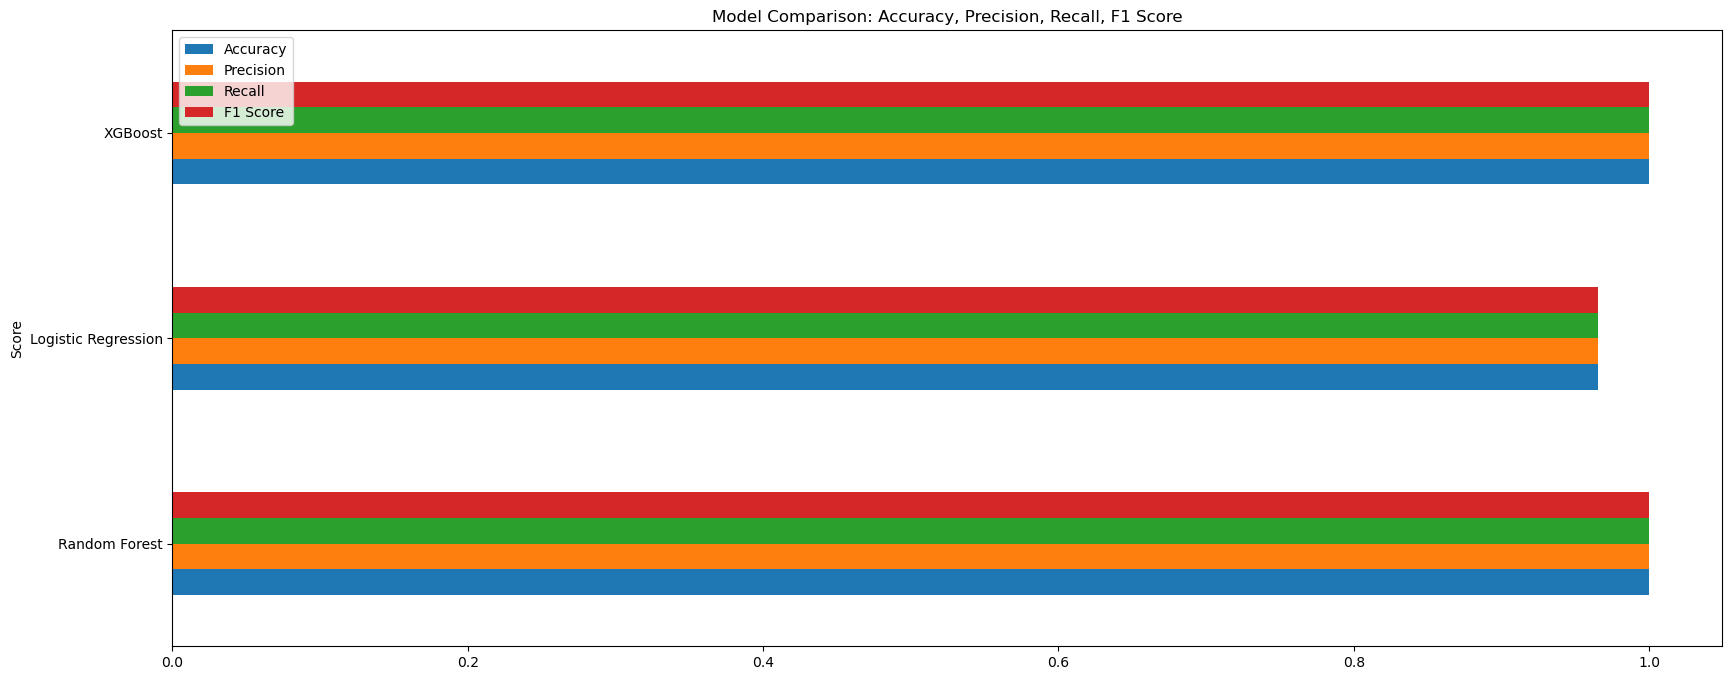

In [259]:
# Plot the metrics
metrics_df.set_index('Model').plot(kind='barh', figsize=(20, 8))

# Add title and labels

plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

Comparing the models we see that the logistic regression model though having excellent performance, falls short to both the random forest and XGBoost classifier which have near perfect classification power on the dataset.

## Conclusion and Future Work

Through extensive analysis, both the Random Forest and XGBoost Classifier emerged as the top-performing models for fraud detection, exhibiting near-perfect classification accuracy. While the Logistic Regression model also demonstrated strong performance, it slightly lagged behind the tree-based models in detecting fraudulent transactions.

The results suggest that by leveraging more detailed, non-anonymized data, these models could identify critical features contributing to fraud, thereby enabling businesses to proactively address fraudulent activities.

To further enhance the model, a real-time data streaming pipeline could be implemented to provide instantaneous fraud detection, significantly reducing the time to action. As the model is exposed to continuously incoming transaction data, its performance is expected to improve, allowing it to generalize better and detect fraud more accurately over time. Additionally, upgrading the infrastructure with more powerful hardware would ensure the system remains scalable and efficient in a production environment.

This project demonstrates the potential of AI-driven fraud detection systems and highlights opportunities for further refinement and real-world deployment to help organizations combat fraud more effectively.